In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
import numpy as np
from IPython.core.pylabtools import figsize

figsize(12.5,7)


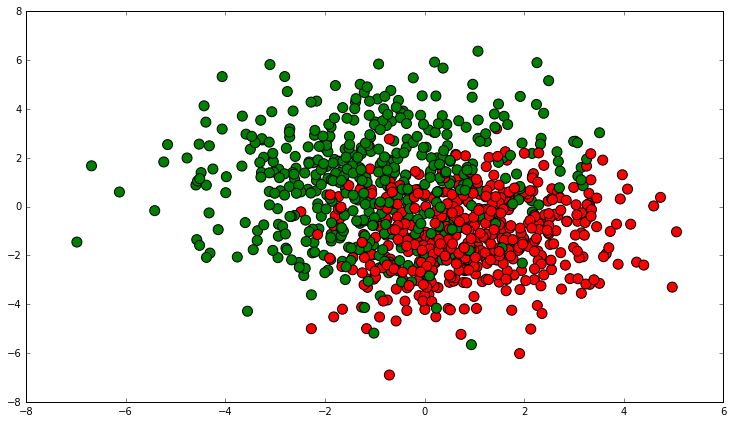

In [2]:
n_samples = 1000
n_features=10
n_informative = 9

X, Y = make_classification(n_samples=n_samples,n_features=n_features, n_redundant=0, n_informative=n_informative,
                             n_clusters_per_class=1)


len(X)
colors = ['r' if x ==1 else 'g' for x in Y]



plt.scatter(X[:, 0], X[:, 1], marker='o',s=100, c=colors)


number of feature dimensions: 10
mean of prediction : 0.501000
mean of original labels: 0.500000
mean of misclassification: 0.007000
sum of misclassification: 7.000000


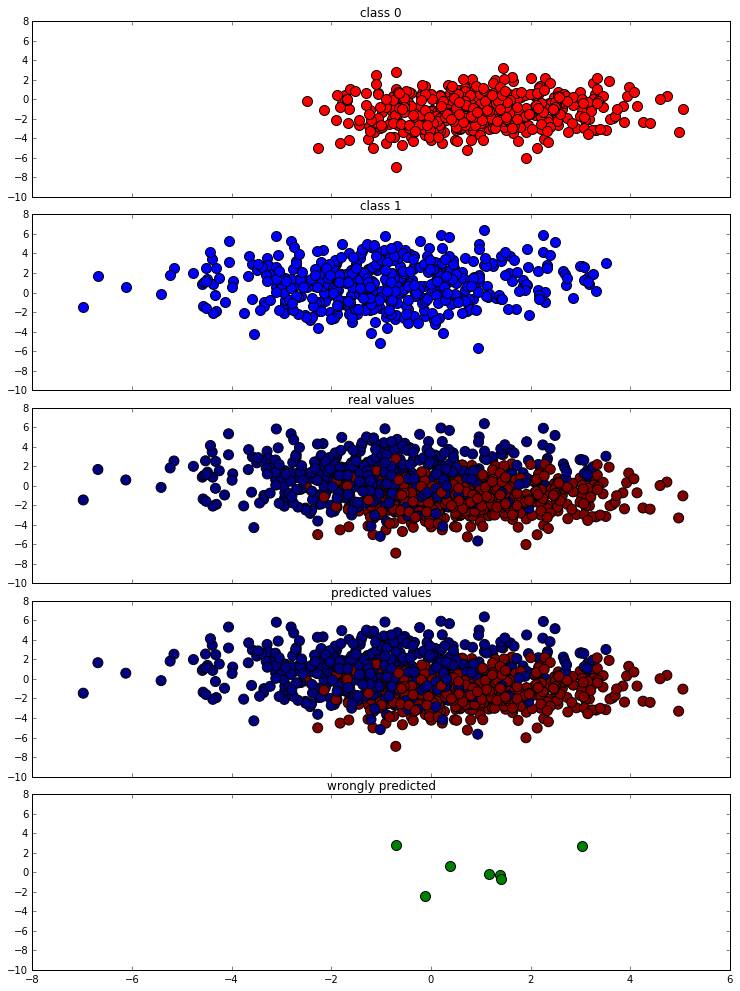

In [3]:
figsize(12.5,17)


#make bias
X1 = np.insert(X,0,np.ones(shape=len(X)),axis=1)
N = len(X1[:])       # Number of training instances (for learning rate decay)
eta0 = 0.1      # initial learning rate


def sigmoid(a):
    '''returns signmoid function'''
    return 1. / (1. + np.exp(-a))

def update(W, X, l, eta):
    '''updates weights'''
    #make prediction
    # Compute the inner product of features and their weights.
    a = np.inner(W,X)
    #cast into [0,1]
    g = sigmoid(a) 
    # Update the feature weights by Stochastic Gradient Descent.
    for i in range(len(X)): 
        #b = b + alpha * (y – prediction) * prediction * (1 – prediction) * x 
        W[i] = W[i] + eta* (l-g)*g*(1-g) *X[i]
        #from http://machinelearningmastery.com/logistic-regression-tutorial-for-machine-learning/

def train(W=np.zeros(shape=len(X1[0]))):
    t = 1
    for x,y in zip(X1,Y):
        #print(x[1])
        update(W,x,y, eta0)# / (1 + t / float(N)))
        t += 1
    return W
        

def classify(W, X):
    return 1 if 0.5 < sigmoid(W.dot(X)) else 0

def test(W, X,Y=Y):
    class_list = []
    for x,y in zip(X1,Y):
        l = classify(W, x)
        class_list += [l]
    #some info    
    print('number of feature dimensions: %i' %n_features)
    print('mean of prediction : %f' %(np.mean(class_list)))
    print('mean of original labels: %f' %np.mean(Y))
    print('mean of misclassification: %f' %np.mean(abs(Y-class_list)))
    print('sum of misclassification: %f'%np.sum(abs(Y-class_list)))
    return class_list



w = None
labels = test(train(),X1)


class_0 = X[np.nonzero(Y)]
class_1 = X[np.nonzero(1-Y)]
#get all the right and wrong predictions
correct = np.array([1 if x == y else 0 for x,y in zip(labels,Y)])
false_X = X[np.nonzero(1-correct)]
false_X, len(false_X)



f, axarr = plt.subplots(5,sharey=True, sharex=True)
axarr[0].scatter(class_0[:, 0], class_0[:, 1], marker='o',s=100,c='r')
axarr[0].set_title('class 0')
axarr[1].scatter(class_1[:, 0], class_1[:, 1], marker='o',s=100, c='b')
axarr[1].set_title('class 1')
axarr[2].scatter(X[:, 0], X[:, 1], marker='o',s=100, c=Y)
axarr[2].set_title('real values')
axarr[3].scatter(X[:, 0], X[:, 1], marker='o',s=100, c=labels)
axarr[3].set_title('predicted values')
axarr[4].scatter(false_X[:,0],false_X[:, 1  ],marker = 'o',s=100,c='g')
axarr[4].set_title('wrongly predicted')
f.subplots_adjust(hspace=0.1)



In [4]:
w = train()
for i in range(100):
    w = train(w)
labels = test(train(w),X1)


number of feature dimensions: 10
mean of prediction : 0.500000
mean of original labels: 0.500000
mean of misclassification: 0.004000
sum of misclassification: 4.000000


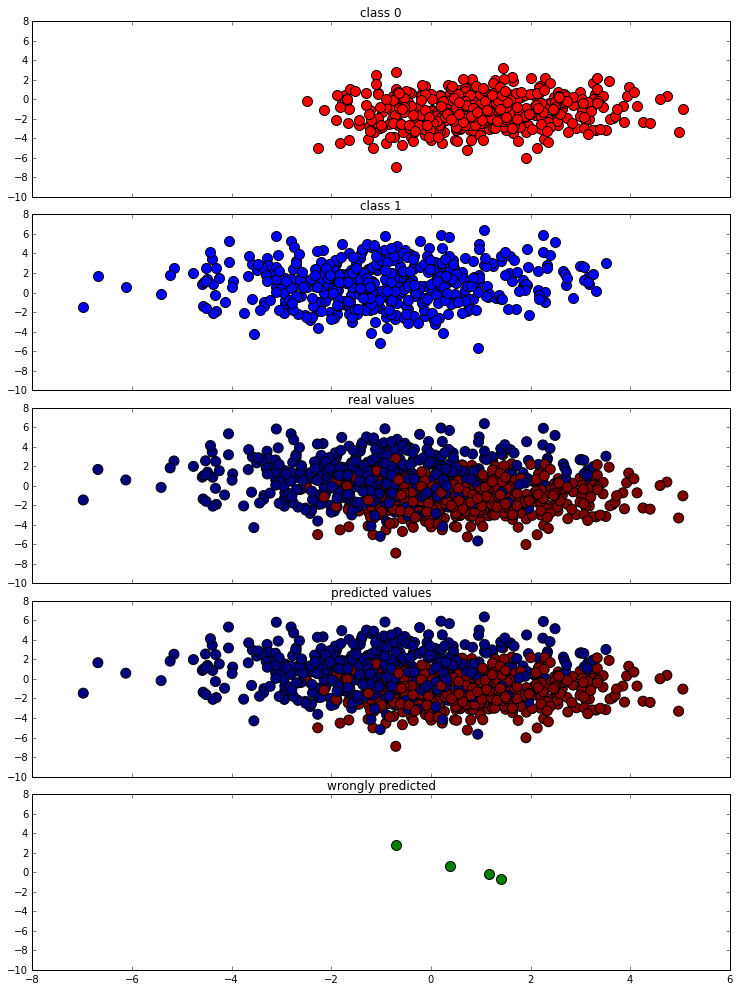

In [5]:

class_0 = X[np.nonzero(Y)]
class_1 = X[np.nonzero(1-Y)]
#get all the right and wrong predictions
correct = np.array([1 if x == y else 0 for x,y in zip(labels,Y)])
false_X = X[np.nonzero(1-correct)]
false_X, len(false_X)



f, axarr = plt.subplots(5,sharey=True, sharex=True)

axarr[0].scatter(class_0[:, 0], class_0[:, 1], marker='o',s=100,c='r')
axarr[0].set_title('class 0')
axarr[1].scatter(class_1[:, 0], class_1[:, 1], marker='o',s=100, c='b')
axarr[1].set_title('class 1')

axarr[2].scatter(X[:, 0], X[:, 1], marker='o',s=100, c=Y)
axarr[2].set_title('real values')




axarr[3].scatter(X[:, 0], X[:, 1], marker='o',s=100, c=labels)
axarr[3].set_title('predicted values')
axarr[4].scatter(false_X[:,0],false_X[:, 1  ],marker = 'o',s=100,c='g')
axarr[4].set_title('wrongly predicted')

f.subplots_adjust(hspace=0.1)

